<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi tutorial @ EASYGO Training Week</h1>
<a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

---
# Create a subsurface geometry & mesh

## Objectives 

In this tutorial we will:

1. Create our first subsurface geometry for all subsequent notebooks
2. Explore the [pyGIMLi meshing tools](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html)
3. Create an unstructured triangular mesh
4. Demonstrate possibilities to modify, visualize, export, and import meshes
---

In [1]:
# Just some plotting settings
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook

In [2]:
import pygimli as pg # import pygimli with short name
from pygimli import meshtools as mt # import a module 
from pygimli.viewer import showMesh # import a function

## Geometry creation
Creating a subsurface model. We create a geometry definition of the domain which is a simple rectangle. The inputs are start and end points and you can also set a specific marker. The default marker start is 1. 

### Create a "world" (i.e., a layered subsurface)

In [3]:
# dimensions of the world
left = -30
right = 30
depth = 25

In [4]:
world = mt.createWorld(start=[left, 0],
                       end=[right, -depth],
                       layers=[-5])
print(world)

Mesh: Nodes: 6 Cells: 0 Boundaries: 7


[`pg.show`](https://www.pygimli.org/pygimliapi/_generated/pygimli.viewer.html?highlight=show#pygimli.viewer.show) is a handy tool to show your world and how it is being built

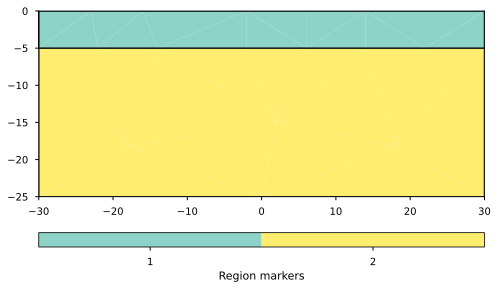

In [5]:
pg.show(world); 

### Create a line (e.g., dipping interface)

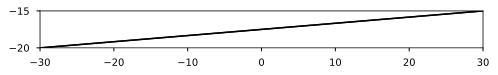

In [6]:
line = mt.createLine(start=[left, -20], end=[right, -15])
pg.show(line);

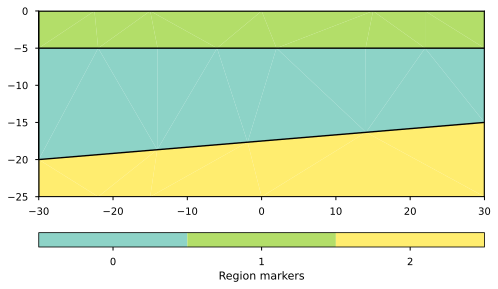

In [7]:
geometry = world + line
pg.show(geometry);

Note that the line cuts region 2 dividing it into two. The upper part does not contain a region marker and thus becomes region 0.

### Create a polygon (e.g., geological body)

Next we create a polygon that is closed and contains three vertices. You can add more nodes to the polygon with `addNodes` and define how to interpolate between these nodes with `interpolate`

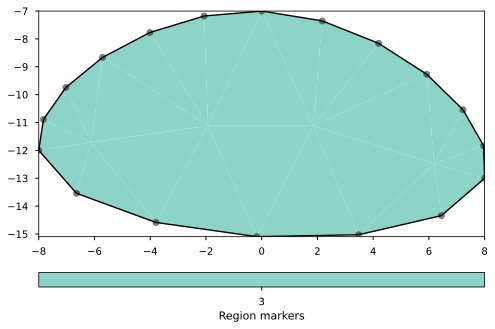

In [8]:
body = mt.createPolygon([[-8, -12], [0, -7], [8, -13]],
                        isClosed=True, marker=3,
                        addNodes=5,
                        interpolate='spline', 
                        )
pg.show(body, showNodes=True);

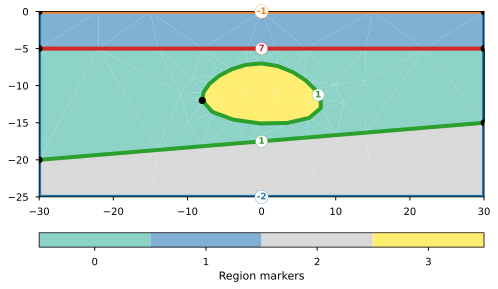

In [9]:
geometry += body
pg.show(geometry, boundaryMarkers=True);

## Mesh creation & quality

pyGIMLi has different ways to create meshes. [`mt.createMesh`](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html?highlight=createmesh#pygimli.meshtools.createMesh) creates a mesh using *Triangle*, a two-dimensional constrained Delaunay mesh generator. 

The additional input parameters control the maximum triangle area and the mesh smoothness. The quality factor prescribes the minimum angles allowed in the final mesh. This can improve numerical accuracy, however, fine meshes lead to increased computational costs. Notice that we are now using [`showMesh`](https://www.pygimli.org/pygimliapi/_generated/pygimli.viewer.html?highlight=show#pygimli.viewer.showMesh) which is convenient for 2D mesh visualization.

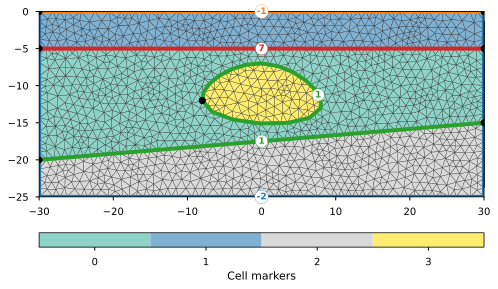

In [10]:
from pygimli.viewer import showMesh
mesh = mt.createMesh(geometry, 
                     area=1.0,
                     quality=33,
                     smooth=[2, 4] # [0:no smoothing or 1:node center or 2:weighted node center, # of iter]
                    )
showMesh(mesh, markers=True, showMesh=True); 

**Save geometry and mesh for later re-use**

In [11]:
mt.exportPLC(geometry, "data/geometry") # can be read by mt.importPLC()
mesh.save("data/mesh.bms"); # can be load by pg.load()

## Mesh modification

### Translating

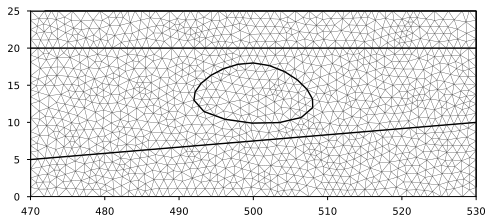

In [12]:
translated_mesh = pg.Mesh(mesh)
translated_mesh.translate([500, 25]) # Move 500 meters in x- and 25 meters in y-direction
pg.show(translated_mesh);

### Scaling

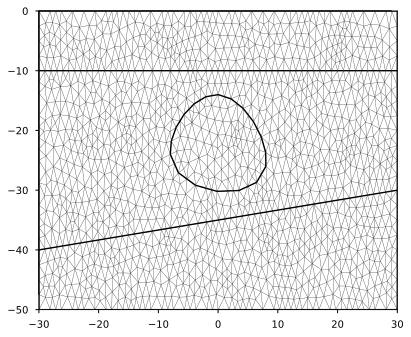

In [13]:
scaled_mesh = pg.Mesh(mesh) 
scaled_mesh.scale([1, 2])
pg.show(scaled_mesh);

## Rotating

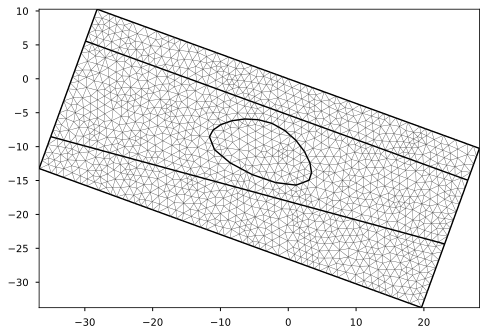

In [14]:
import numpy as np
rotated_mesh = pg.Mesh(mesh) 
rotated_mesh.rotate([0, 0, np.deg2rad(-20)])
pg.show(rotated_mesh);

## Extrusion (3D visual)

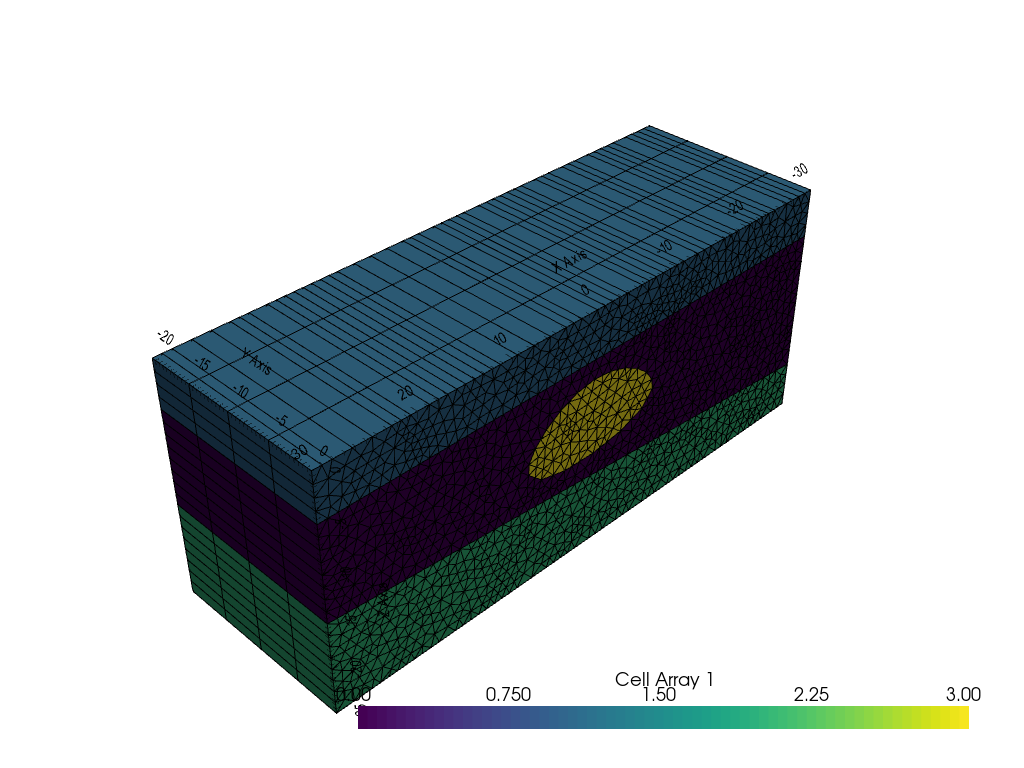

In [15]:
extruded_mesh = mt.extrudeMesh(mesh, np.linspace(0, 20, 5)) #adding dimension Z in this case 
extruded_mesh.rotate([np.pi/2, 0, 0]) # rotating mesh to switch y/z direction and view the top of the extended mesh. 
pg.show(extruded_mesh, extruded_mesh.cellMarkers()); # pyvista powered (make sure to check Bane's tutorial tomorrow)

## Final remarks on 3D

Please note pyGIMLi is fully 3D-capable and that all the functions and methods we saw above are also working in 3D. Plus, you can read any externally created 3D mesh with [`mt.readMeshIO`](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html?highlight=meshio#pygimli.meshtools.readMeshIO) leveraging upon the wonderful [*meshio* package](https://github.com/nschloe/meshio).

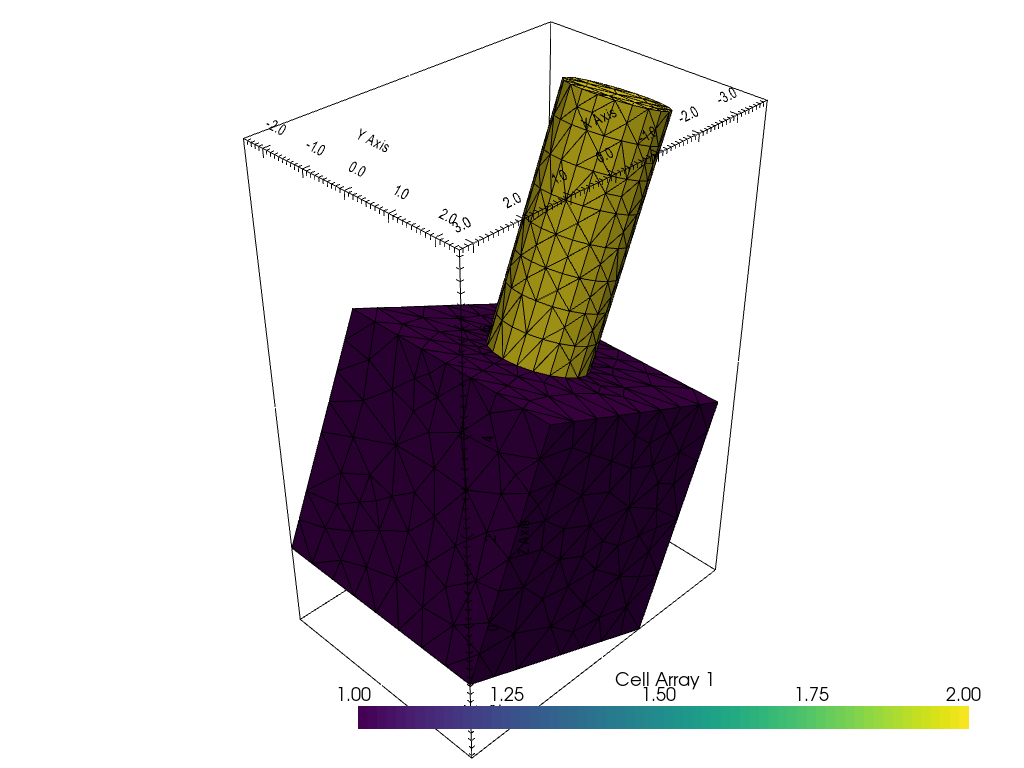

In [16]:
cube = mt.createCube(size=[5, 5, 5])
cylinder = mt.createCylinder(height=5, pos=[0, 0, 5], marker=2, nSegments=20)
geometry3D = cube + cylinder
mesh3D = mt.createMesh(geometry3D, area=0.1)
mesh3D.rotate([0, -np.pi/8, 0.0])
pg.show(mesh3D, mesh3D.cellMarkers());